In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [92]:
sentencing_df=pd.read_csv("./illinois_doc_dataset/csv/sentencing.csv",delimiter=";",index_col=0)
display(sentencing_df)

,mittimus,class,count,offense,custody_date,sentence,county,sentence_discharged,Unnamed: 9
id,,,,,,,,,
A00147,82CF32,1,2,AGGR KIDNAPPING-NO RANSOM,11/26/1982,30 Years 0 Months 0 Days,JASPER,NO,NaN
A00147,82CF32,X,1,ATTEMPT MURDER/INTENT TO KILL/INJURE,11/26/1982,50 Years 0 Months 0 Days,JASPER,NO,NaN
A00147,82CF32,X,1,RAPE,11/26/1982,50 Years 0 Months 0 Days,JASPER,NO,NaN
A00147,82CF32,2,1,BURGLARY,11/26/1982,14 Years 0 Months 0 Days,JASPER,NO,NaN
A00220,7916505,3,1,ATTEMPT BURGLARY,00/00/0000,2 Years 0 Months 0 Days,COOK,YES,NaN
...,...,...,...,...,...,...,...,...,...
Y32582,17CF199,2,1,AID/ABET/POSS/SELL STOLEN VEH,05/28/2018,3 Years 0 Months 0 Days,MCDONOUGH,NO,NaN
Y32582,17CF199,4,1,AGG FLEEING/2+ CON DEVICES,05/28/2018,1 Years 0 Months 0 Days,MCDONOUGH,NO,NaN
Y54605,15CR0531401,1,1,INVOL SEX SERV MINOR AGE 17-18,02/09/2015,4 Years 6 Months 0 Days,COOK,NO,NaN


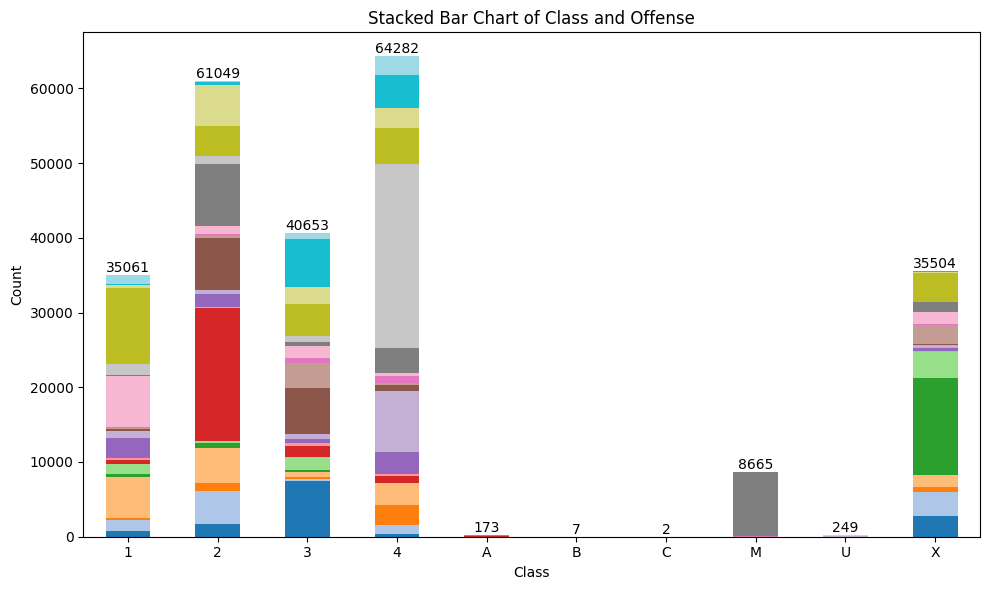

In [93]:
grouped=sentencing_df.groupby(['class','offense']).size()
# display(grouped)

stacked_data=grouped.unstack(fill_value=0)
# display(stacked_data)

ax = stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Class and Offense')
plt.legend(title='Subcategory', bbox_to_anchor=(1.05, 1), loc='upper left')

total_counts = stacked_data.sum(axis=1)

# Add total count at the top of each bar
for i, total in enumerate(total_counts):
    x = i  # Position of the bar
    y = total  # The total height of the stacked bar
    ax.text(x, y, f'{total:.0f}', ha='center', va='bottom', fontsize=10)

ax.legend().set_visible(False)
plt.xticks(rotation=0)
plt.tight_layout()
# plt.savefig('stacked_bar_plot.png')

# fig_legend = plt.figure(figsize=(5, 4))
# ax_legend = fig_legend.add_subplot(111)
# handles, labels = ax.get_legend_handles_labels()
# ax_legend.legend(handles, labels, title='Subcategory', bbox_to_anchor=(1.05, 1), loc='upper left')
# fig_legend.tight_layout()

# fig_legend.savefig('legend.png', bbox_inches='tight')

# plt.close(fig_legend)
# plt.close()
plt.show()

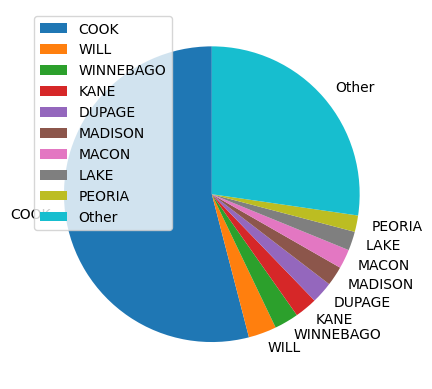

In [94]:
county_distribution=sentencing_df['county'].value_counts()
plt.pie(
    np.append(county_distribution.values[:9],county_distribution.values[9:].sum()),
    labels=np.append(county_distribution.keys()[:9],'Other'),
    startangle=90,
    )
plt.legend().set_visible(True)
plt.show()

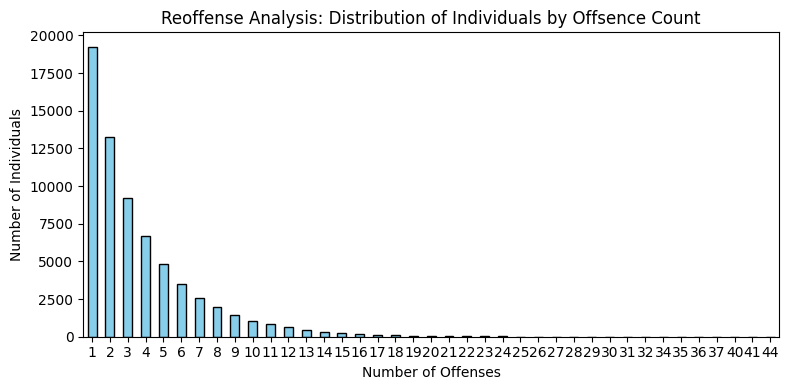

In [95]:
offense_categories=sentencing_df.groupby('id').size().value_counts().sort_index()

plt.figure(figsize=(8,4))
offense_categories.plot(kind='bar',color='skyblue',edgecolor='black')
plt.xlabel('Number of Offenses')
plt.ylabel('Number of Individuals')
plt.title('Reoffense Analysis: Distribution of Individuals by Offsence Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

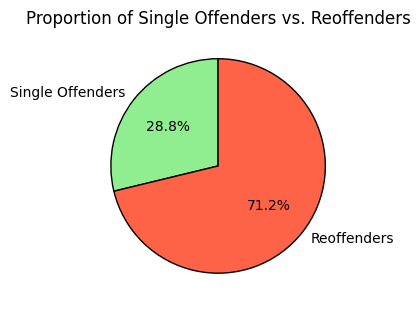

In [96]:
offense_counts=sentencing_df.groupby('id').size()
single_offenders = (offense_counts == 1).sum()
reoffenders = (offense_counts > 1).sum()

labels = ['Single Offenders', 'Reoffenders']
sizes = [single_offenders, reoffenders]
colors = ['lightgreen', 'tomato']

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})

plt.title('Proportion of Single Offenders vs. Reoffenders')

plt.tight_layout()
plt.show()

In [97]:
person_df=pd.read_csv('./illinois_doc_dataset/csv/person.csv',delimiter=';',index_col=0)
display(person_df)

,name,date_of_birth,weight,hair,sex,height,race,eyes,admission_date,projected_parole_date,...,projected_discharge_date,parole_date,electronic_detention_date,discharge_date,parent_institution,offender_status,location,sex_offender_registry_required,alias,Unnamed: 21
id,,,,,,,,,,,,,,,,,,,,,
A00147,"MCCUTCHEON, JOHN",06/14/1949,185.0,Brown,Male,67.0,White,Blue,02/16/1983,10/06/2033,...,10/06/2036,NaN,NaN,NaN,DIXON CORRECTIONAL CENTER,IN CUSTODY,DIXON,True,NaN,NaN
A00220,"WALKER, ISIAH",03/30/1957,155.0,Black,Male,73.0,Black,Brown,05/19/2016,NaN,...,NaN,NaN,NaN,NaN,STATEVILLE CORRECTIONAL CENTER,NON-IDOC CUSTODY,ILL/OTH STATE/FED CONCURR,NaN,NaN,NaN
A00360,"BELL, HOWARD",12/18/1946,167.0,Gray or Partially Gray,Male,69.0,White,Green,02/26/1988,NaN,...,TO BE DETERMINED,10/02/2017,NaN,NaN,PINCKNEYVILLE CORRECTIONAL CENTER,PAROLE,PAROLE DISTRICT 1,NaN,HOWARD R BELL | DONALD BROADSTONE | RONALD B...,NaN
A00367,"GARVIN, RAYMOND",01/12/1954,245.0,Black,Male,72.0,Black,Brown,11/09/2017,11/20/2018,...,11/20/2020,NaN,NaN,NaN,WESTERN ILLINOIS CORRECTIONAL CENTER,IN CUSTODY,WESTERN ILLINOIS,NaN,NaN,NaN
A01054,"TIPTON, DARNELL",03/25/1954,166.0,Salt and Pepper,Male,67.0,Black,Brown,12/23/1988,08/14/2065,...,08/14/2068,NaN,NaN,NaN,MENARD CORRECTIONAL CENTER,IN CUSTODY,MENARD,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y25363,"RANEY, JEFFERY D.",05/15/1986,170.0,Brown,Male,71.0,White,Brown,10/25/2017,NaN,...,07/05/2019,07/05/2018,NaN,NaN,SOUTHWESTERN CORRECTIONAL CENTER,PAROLE,PAROLE DISTRICT 5,NaN,NaN,NaN
Y25364,"CALDWELL, KIMBERLY D.",02/23/1972,112.0,Brown,Female,62.0,White,Green,10/25/2017,NaN,...,TO BE DETERMINED,10/25/2017,NaN,NaN,LOGAN CORRECTIONAL CENTER,ABSCONDER,PAROLE,NaN,NaN,NaN
Y25365,"WEIGAND, KARLEE R.",06/16/1992,158.0,Brown,Female,63.0,White,Brown,10/25/2017,NaN,...,04/07/2020,04/07/2018,NaN,NaN,VIENNA CORRECTIONAL CENTER,PAROLE,PAROLE DISTRICT 2,NaN,NaN,NaN


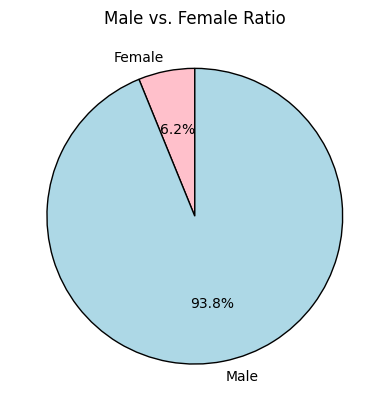

In [98]:
grouped=person_df.groupby(['sex']).size()
labels=['Female','Male']
colors = ['pink', 'lightblue']

plt.title('Male vs. Female Ratio')
plt.pie(grouped.values,labels=labels,autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.show()

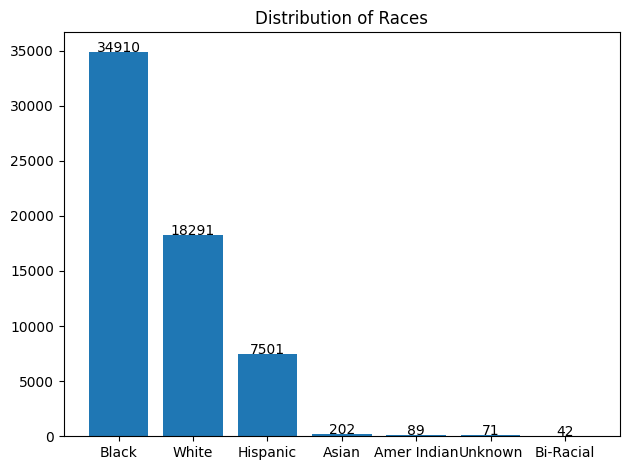

In [99]:
grouped=person_df.groupby(['race']).size().sort_values(ascending=False)

plt.title('Distribution of Races')
plt.bar(grouped.keys(),grouped.values)
for i, value in enumerate(grouped.values):
    plt.text(i, value + 5, str(value), ha='center')
plt.tight_layout()
plt.show()

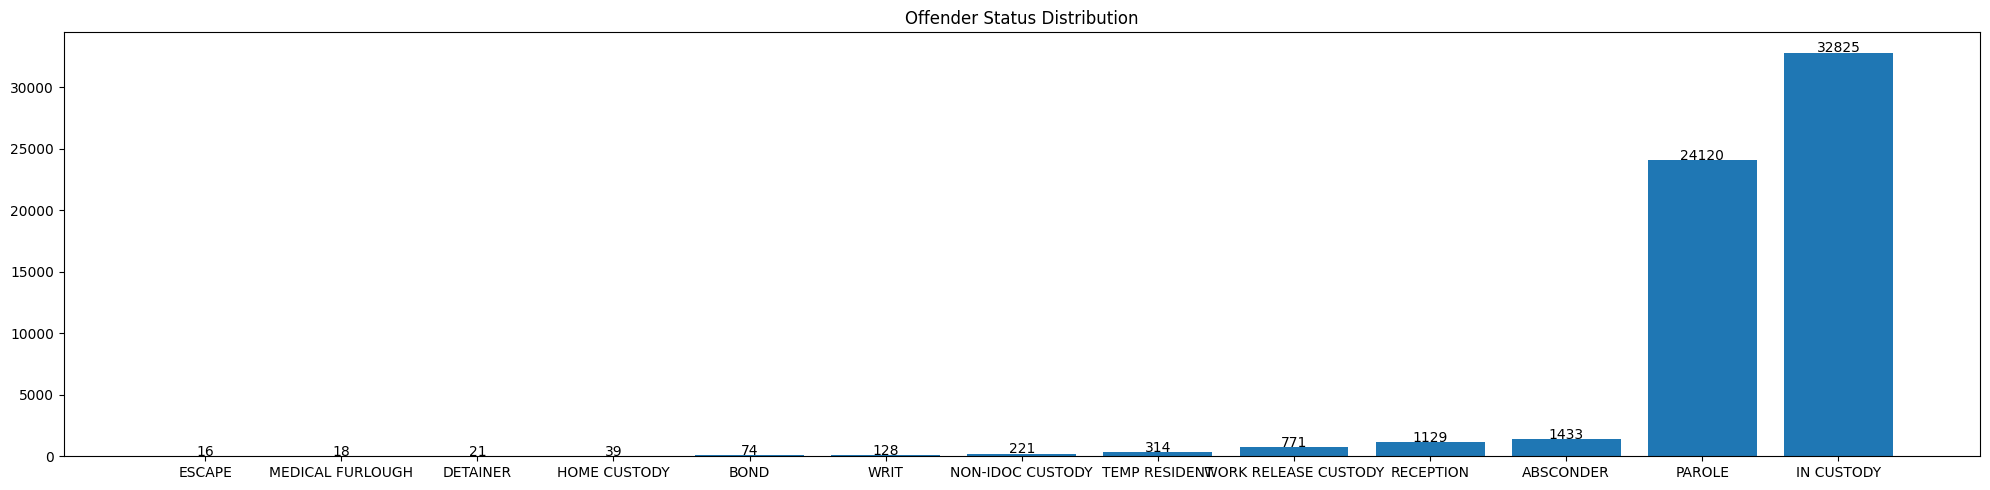

In [110]:
grouped=person_df.groupby('offender_status').size().sort_values()

plt.figure(figsize=(20,5))
plt.title('Offender Status Distribution')
plt.bar(grouped.keys(),grouped.values)
for i, value in enumerate(grouped.values):
    plt.text(i, value + 5, str(value), ha='center')
plt.tight_layout()
plt.show()

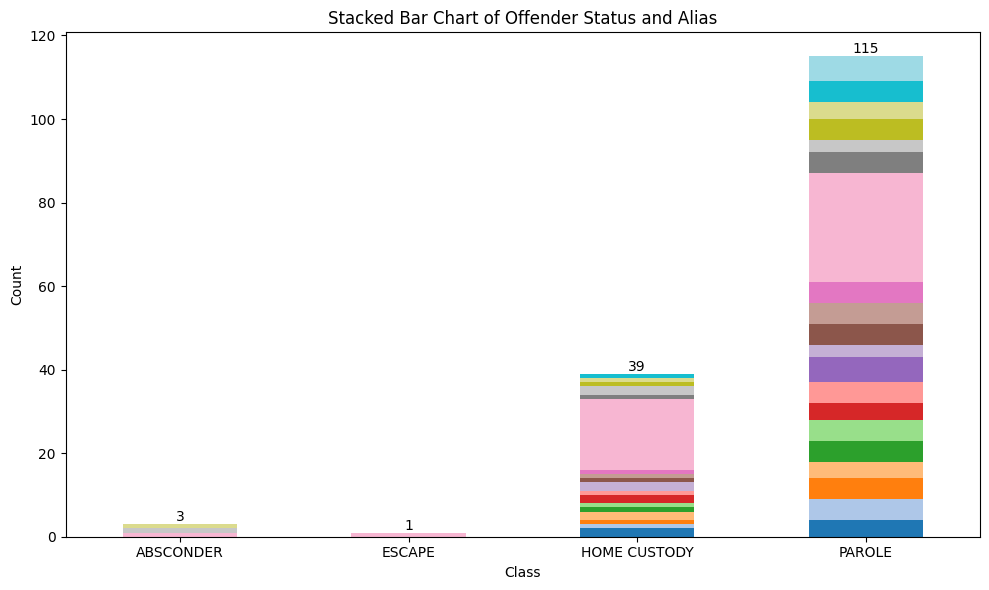

In [113]:
grouped=person_df.groupby(['offender_status','alias']).size()
# display(grouped)

stacked_data=grouped.unstack(fill_value=0)
# display(stacked_data)

ax = stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Offender Status and Alias')
plt.legend(title='Subcategory', bbox_to_anchor=(1.05, 1), loc='upper left')

total_counts = stacked_data.sum(axis=1)

# Add total count at the top of each bar
for i, total in enumerate(total_counts):
    x = i  # Position of the bar
    y = total  # The total height of the stacked bar
    ax.text(x, y, f'{total:.0f}', ha='center', va='bottom', fontsize=10)

ax.legend().set_visible(False)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

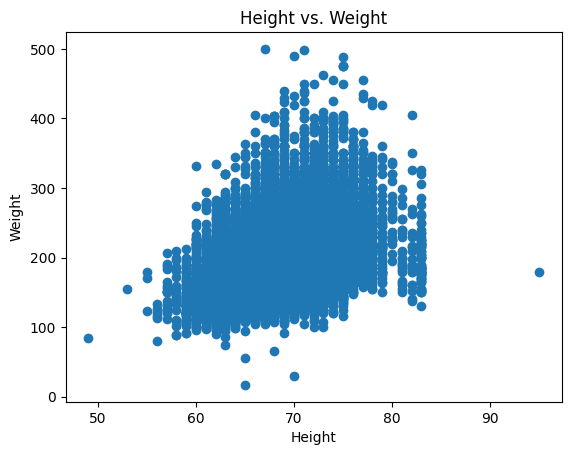

In [118]:
plt.title('Height vs. Weight')
plt.scatter(person_df['height'],person_df['weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()